Функция и библиотеки

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize, Bounds, LinearConstraint, NonlinearConstraint

a = 7
b = 4
c = 20

In [68]:
def f(x):
    '''Objective function'''
    return a * x[0] ** 2 + b * x[1] ** 2 + c * x[0] * np.cos(np.pi * x[0]) + 4


def df(x):
    '''Gradient of the objective function'''
    return np.array([2 * a * x[0] + c * (np.cos(np.pi * x[0]) - np.pi * x[0] * np.sin(np.pi * x[0])), 2 * b * x[1]])



Целевая функция

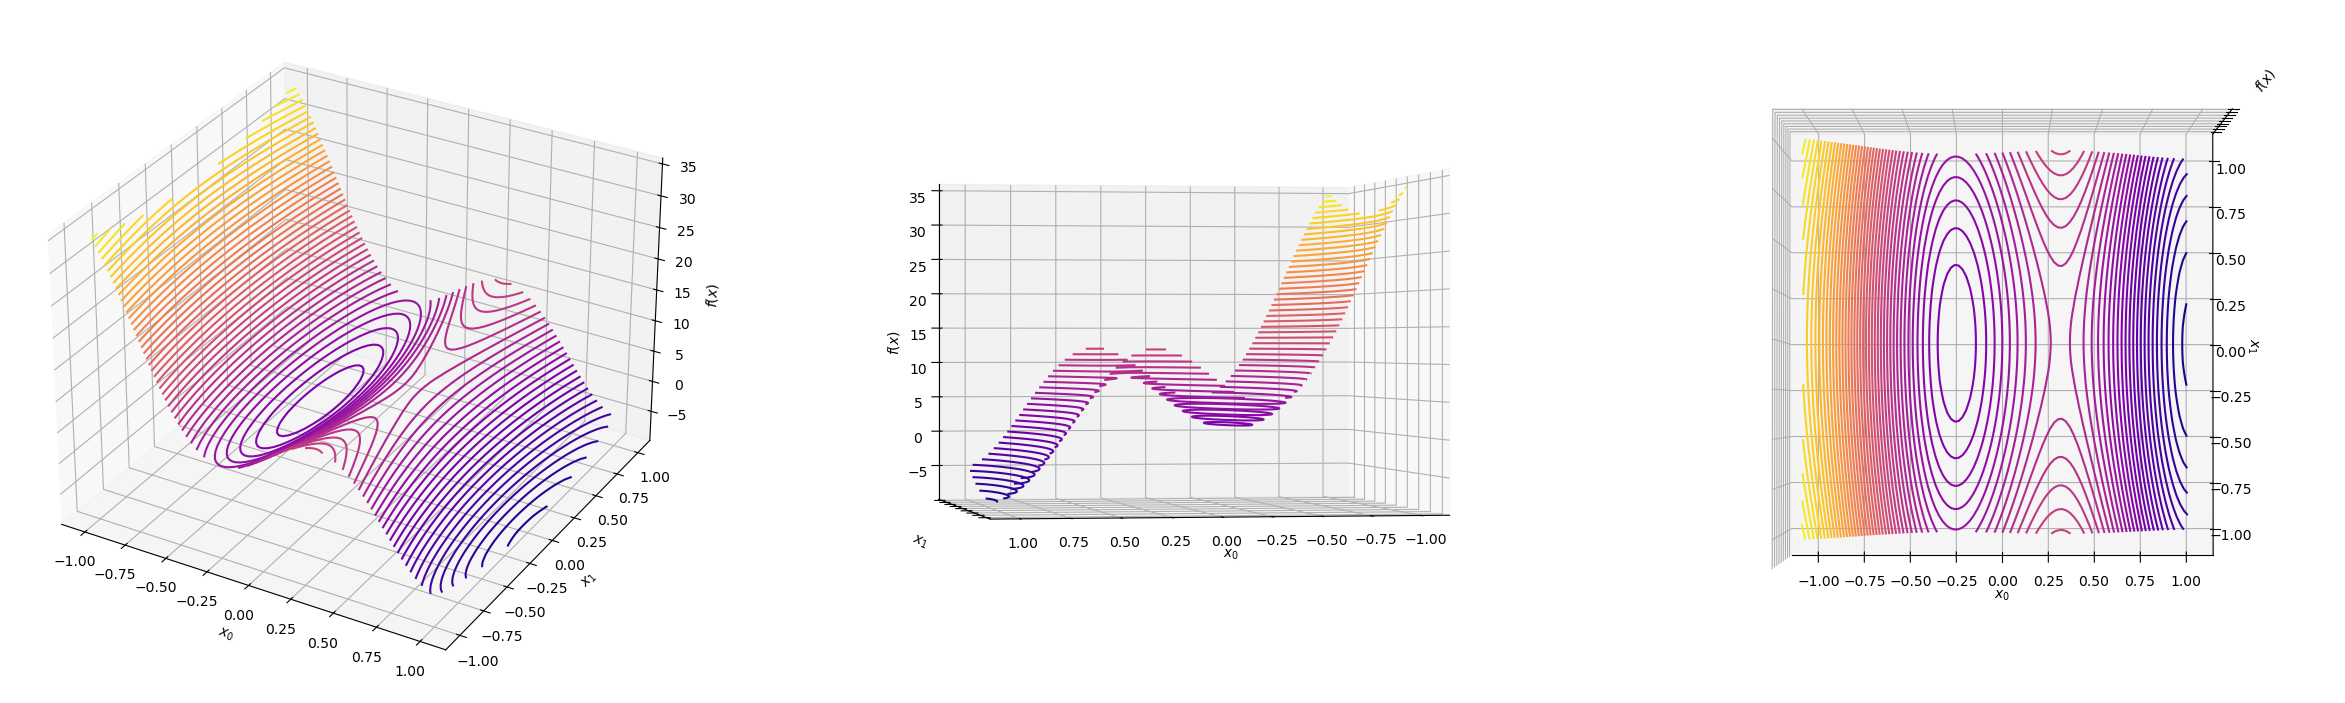

In [69]:
X0, X1 = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))
Z = f(np.stack([X0, X1]))

# Plot
fig = plt.figure(figsize=(30, 20))

# First subplot
ax = fig.add_subplot(1, 3, 1, projection='3d')
ax.contour3D(X0, X1, Z, 70, cmap='plasma')
ax.set_xlabel('$x_{0}$')
ax.set_ylabel('$x_{1}$')
ax.set_zlabel('$f(x)$')

# Second subplot
ax = fig.add_subplot(1, 3, 2, projection='3d')
ax.contour3D(X0, X1, Z, 70, cmap='plasma')
ax.set_xlabel('$x_{0}$')
ax.set_ylabel('$x_{1}$')
ax.set_zlabel('$f(x)$')
ax.axes.yaxis.set_ticklabels([])
ax.view_init(0, 80)

# Third subplot
ax = fig.add_subplot(1, 3, 3, projection='3d')
ax.contour3D(X0, X1, Z, 70, cmap='plasma')
ax.set_xlabel('$x_{0}$')
ax.set_ylabel('$x_{1}$')
ax.set_zlabel('$f(x)$')
ax.axes.zaxis.set_ticklabels([])
ax.view_init(89, -90);

# 1 

In [70]:
# Starting point
x_start = np.array([0.5, 0.5])

# Optimization
result = minimize(
    f, x_start, method='trust-constr', jac=df)

result.x.round(3)

array([1.027, 0.   ])

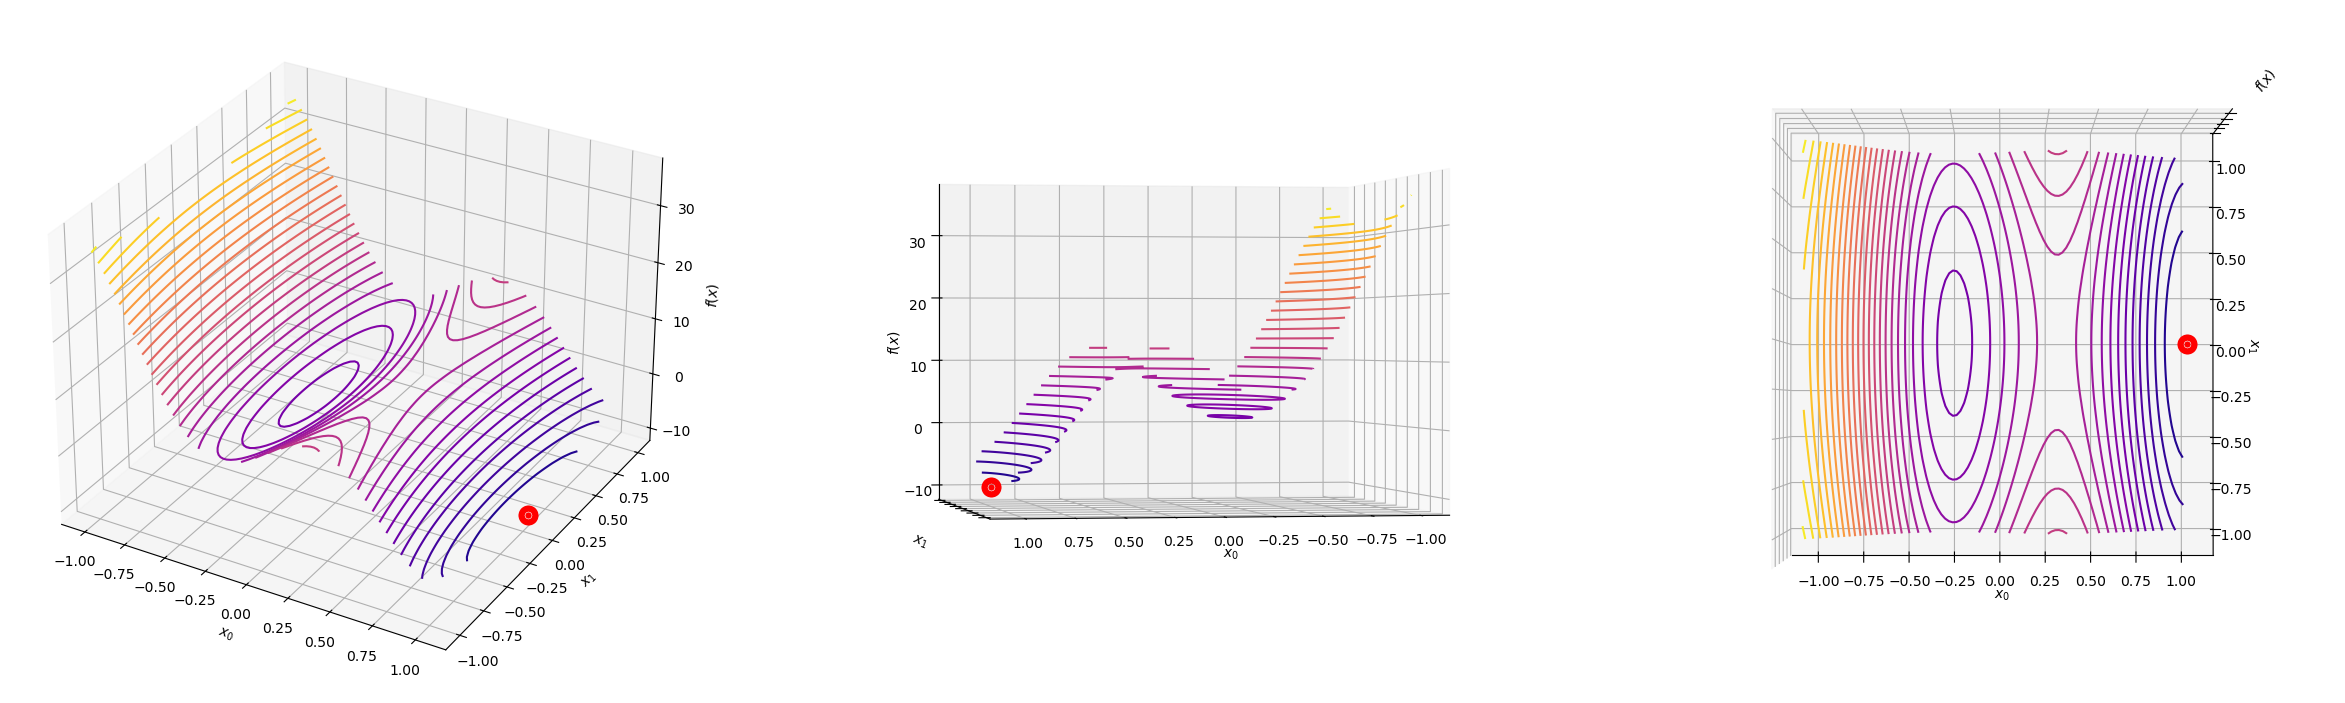

In [71]:
# Minimum from unconstrained optimization
min_x0, min_x1 = np.meshgrid(result.x[0], result.x[1])   
min_z = f(np.stack([min_x0, min_x1]))

# Plot
fig = plt.figure(figsize=(30, 20))

# First subplot
ax = fig.add_subplot(1, 3, 1, projection='3d')
ax.contour3D(X0, X1, Z, 40, cmap='plasma')
ax.scatter(min_x0, min_x1, min_z, marker='o', color='red', linewidth=10)
ax.set_xlabel('$x_{0}$')
ax.set_ylabel('$x_{1}$')
ax.set_zlabel('$f(x)$')

# Second subplot
ax = fig.add_subplot(1, 3, 2, projection='3d')
ax.contour3D(X0, X1, Z, 40, cmap='plasma')
ax.scatter(min_x0, min_x1, min_z, marker='o', color='red', linewidth=10)
ax.set_xlabel('$x_{0}$')
ax.set_ylabel('$x_{1}$')
ax.set_zlabel('$f(x)$')
ax.axes.yaxis.set_ticklabels([])
ax.view_init(0, 80)

# Third subplot
ax = fig.add_subplot(1, 3, 3, projection='3d')
ax.contour3D(X0, X1, Z, 40, cmap='plasma')
ax.scatter(min_x0, min_x1, min_z, marker='o', color='red', linewidth=10)
ax.set_xlabel('$x_{0}$')
ax.set_ylabel('$x_{1}$')
ax.set_zlabel('$f(x)$')
ax.axes.zaxis.set_ticklabels([])
ax.view_init(89, -90);

# 3

In [72]:
lim = [0.20, 0.35, 0.8, 0.75]

bounds = Bounds([lim[0], lim[1]],  # [min x0, min x1]
                [lim[2], lim[3]])  # [max x0, max x1]

result = minimize(
    f, x_start, method='trust-constr', jac=df, bounds=bounds)

result.x.round(3)

array([0.8 , 0.35])

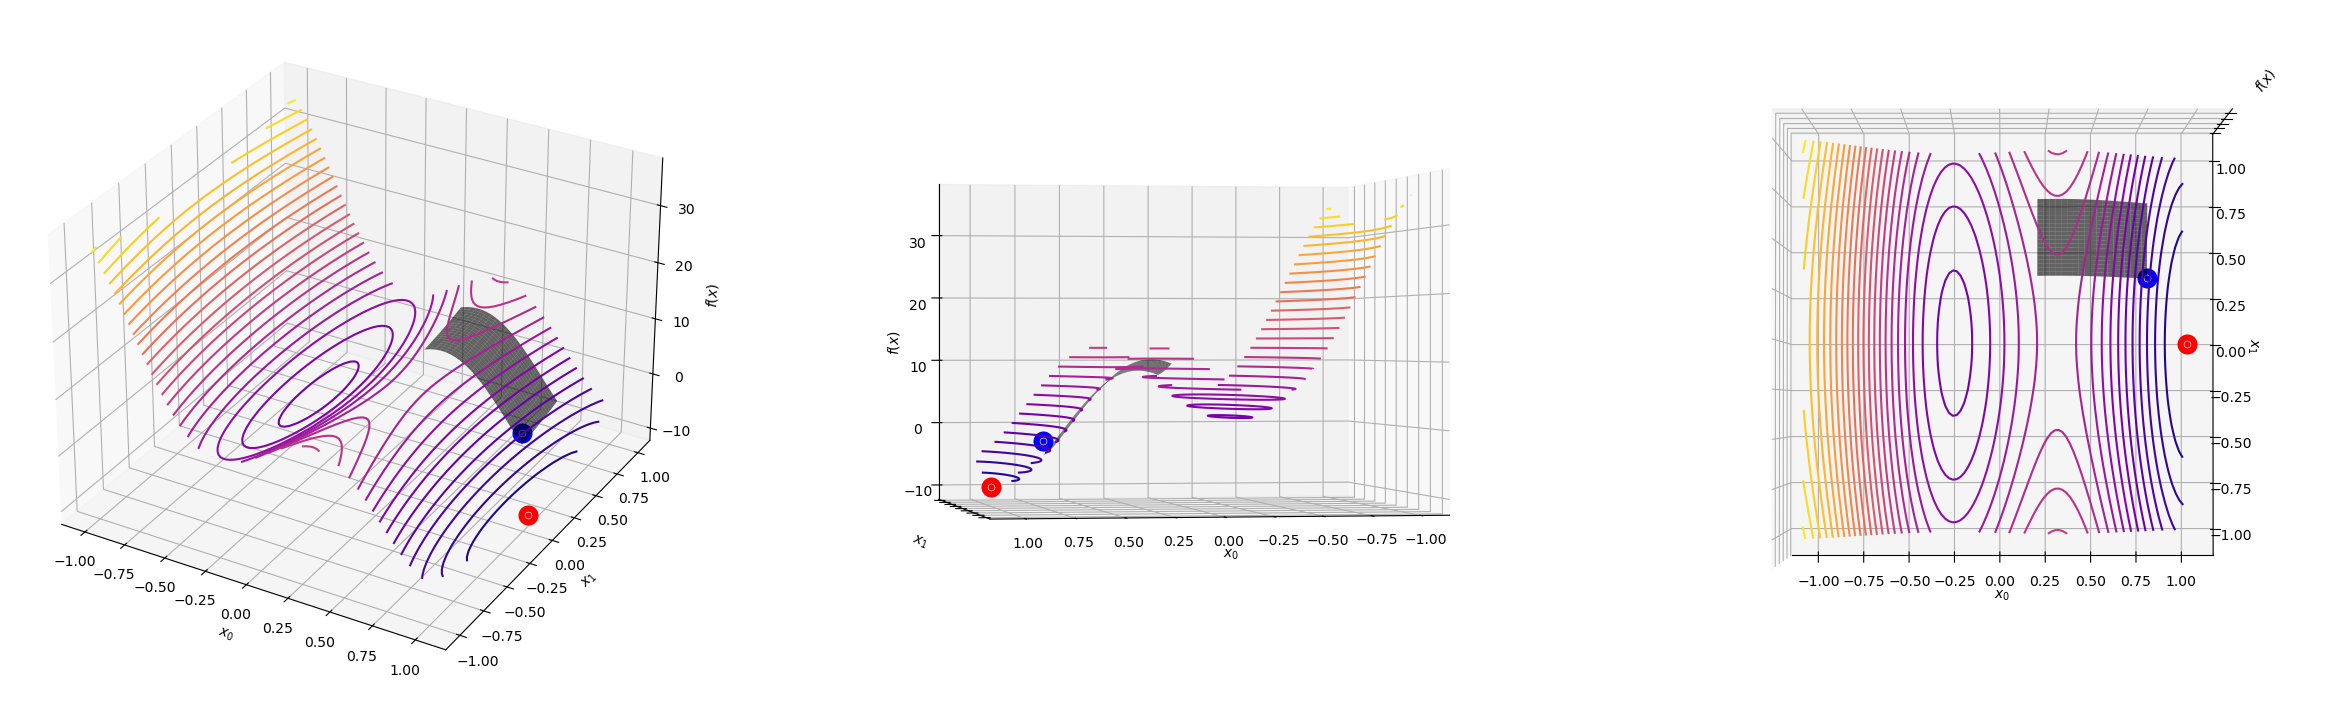

In [73]:
X0_bound, X1_bound = np.meshgrid(np.linspace(lim[0], lim[2], 20), np.linspace(lim[1], lim[3], 20))
Z_bound = f(np.stack([X0_bound, X1_bound]))

# New minimum within bounds
min_x0_bounds, min_x1_bounds = np.meshgrid(result.x[0], result.x[1])   
min_z_bounds = f(np.stack([min_x0_bounds, min_x0_bounds]))

# Plot
fig = plt.figure(figsize=(30, 20))

# First subplot
ax = fig.add_subplot(1, 3, 1, projection='3d')
ax.contour3D(X0, X1, Z, 40, cmap='plasma')
ax.scatter(min_x0, min_x1, min_z, marker='o', color='red', linewidth=10)
ax.scatter(min_x0_bounds, min_x1_bounds, min_z_bounds, marker='o', color='blue', linewidth=10)
ax.plot_surface(X0_bound, X1_bound, Z_bound, color='black', alpha=0.6)
ax.set_xlabel('$x_{0}$')
ax.set_ylabel('$x_{1}$')
ax.set_zlabel('$f(x)$')

# Second subplot
ax = fig.add_subplot(1, 3, 2, projection='3d')
ax.contour3D(X0, X1, Z, 40, cmap='plasma')
ax.scatter(min_x0, min_x1, min_z, marker='o', color='red', linewidth=10)
ax.scatter(min_x0_bounds, min_x1_bounds, min_z_bounds, marker='o', color='blue', linewidth=10)
ax.plot_surface(X0_bound, X1_bound, Z_bound, color='black', alpha=0.6)
ax.set_xlabel('$x_{0}$')
ax.set_ylabel('$x_{1}$')
ax.set_zlabel('$f(x)$')
ax.axes.yaxis.set_ticklabels([])
ax.view_init(0, 80)

# Third subplot
ax = fig.add_subplot(1, 3, 3, projection='3d')
ax.contour3D(X0, X1, Z, 40, cmap='plasma')
ax.scatter(min_x0, min_x1, min_z, marker='o', color='red', linewidth=10)
ax.scatter(min_x0_bounds, min_x1_bounds, min_z_bounds, marker='o', color='blue', linewidth=10)
ax.plot_surface(X0_bound, X1_bound, Z_bound, color='black', alpha=0.6)
ax.set_xlabel('$x_{0}$')
ax.set_ylabel('$x_{1}$')
ax.set_zlabel('$f(x)$')
ax.axes.zaxis.set_ticklabels([])
ax.view_init(89, -90);

# 3 

In [74]:
linear_constraint = LinearConstraint(
    [[1, 0], [1, -1]], [0.35, -np.inf], [np.inf, 0.15])

result = minimize(
    f, x_start, method='trust-constr', jac=df, constraints=linear_constraint)

result.x.round(3)

array([0.996, 0.846])

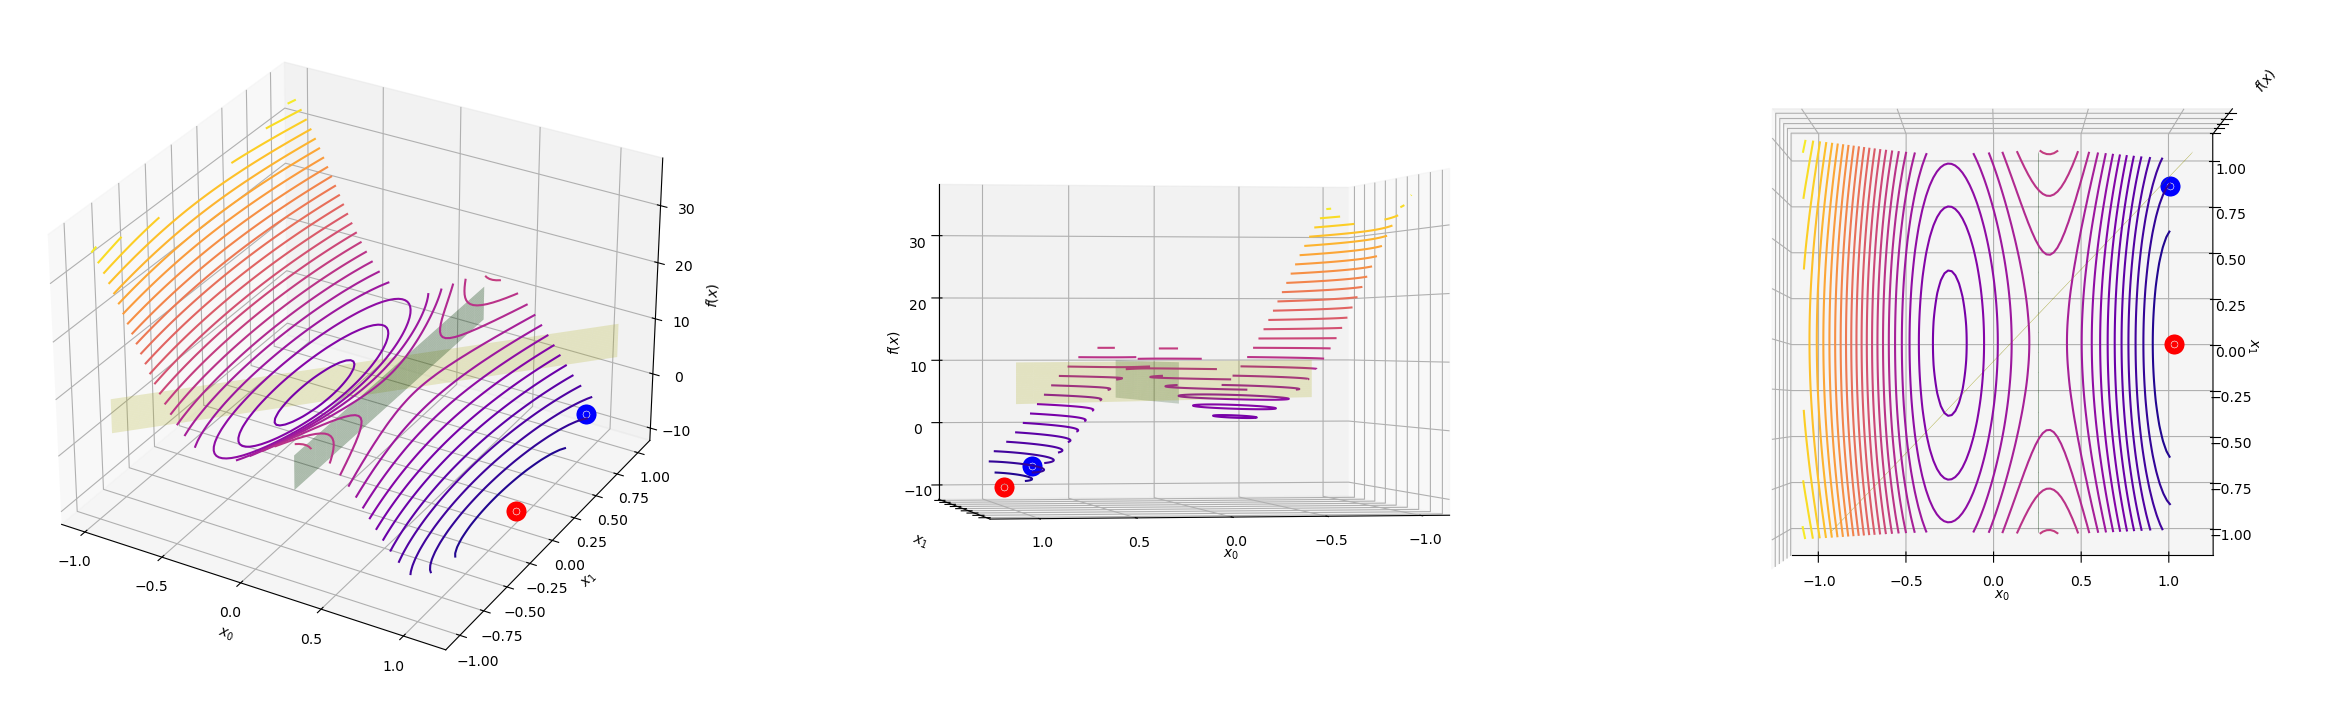

In [75]:
# Linear constraints: first hyperplane
X0_lin_1 = np.repeat(0.25, 20)
X1_lin_1, Z_lin_1 = np.meshgrid(np.linspace(-1, 1, 20), np.linspace(4, 10, 20))

# Linear constraints: second hyperplane
X1_lin_2 = np.linspace(-1, 1, 20)
X0_lin_2 = X1_lin_2 + 0.1

# New minimum with linear constraints
min_x0_lin_constr, min_x1_lin_constr = np.meshgrid(result.x[0], result.x[1])   
min_z_lin_constr = f(np.stack([min_x0_lin_constr, min_x0_lin_constr]))

# Plot
fig = plt.figure(figsize=(30, 20))

# First subplot
ax = fig.add_subplot(1, 3, 1, projection='3d')
ax.contour3D(X0, X1, Z, 40, cmap='plasma')
ax.scatter(min_x0, min_x1, min_z, marker='o', color='red', linewidth=10)
ax.scatter(min_x0_lin_constr, min_x1_lin_constr, min_z_lin_constr, marker='o', color='blue', linewidth=10)
ax.plot_surface(X0_lin_1, X1_lin_1, Z_lin_1, color='green', alpha=0.3)
ax.plot_surface(X0_lin_2, X1_lin_2, Z_lin_1, color='yellow', alpha=0.2)
ax.set_xlabel('$x_{0}$')
ax.set_ylabel('$x_{1}$')
ax.set_zlabel('$f(x)$')

# Second subplot
ax = fig.add_subplot(1, 3, 2, projection='3d')
ax.contour3D(X0, X1, Z, 40, cmap='plasma')
ax.scatter(min_x0, min_x1, min_z, marker='o', color='red', linewidth=10)
ax.scatter(min_x0_lin_constr, min_x1_lin_constr, min_z_lin_constr, marker='o', color='blue', linewidth=10)
ax.plot_surface(X0_lin_1, X1_lin_1, Z_lin_1, color='green', alpha=0.2)
ax.plot_surface(X0_lin_2, X1_lin_2, Z_lin_1, color='yellow', alpha=0.2)
ax.set_xlabel('$x_{0}$')
ax.set_ylabel('$x_{1}$')
ax.set_zlabel('$f(x)$')
ax.axes.yaxis.set_ticklabels([])
ax.view_init(0, 80)

# Third subplot
ax = fig.add_subplot(1, 3, 3, projection='3d')
ax.contour3D(X0, X1, Z, 40, cmap='plasma')
ax.scatter(min_x0, min_x1, min_z, marker='o', color='red', linewidth=10)
ax.scatter(min_x0_lin_constr, min_x1_lin_constr, min_z_lin_constr, marker='o', color='blue', linewidth=10)
ax.plot_surface(X0_lin_1, X1_lin_1, Z_lin_1, color='green', alpha=1)
ax.plot_surface(X0_lin_2, X1_lin_2, Z_lin_1, color='yellow', alpha=1)
ax.set_xlabel('$x_{0}$')
ax.set_ylabel('$x_{1}$')
ax.set_zlabel('$f(x)$')
ax.axes.zaxis.set_ticklabels([])
ax.view_init(89, -90);

# 4

In [77]:
non_linear_eq= lambda x: x[0]**2 + x[1]**2

non_linear_constr = NonlinearConstraint(
    non_linear_eq, 0.1, np.inf)

result = minimize(
    f, np.array([0.5, 1]), method='trust-constr', jac=df, constraints=non_linear_constr)

result.x.round(3)

min_x0_lin_constr, min_x1_lin_constr = np.meshgrid(result.x[0], result.x[1])   
min_z_lin_constr = f(np.stack([min_x0_lin_constr, min_x0_lin_constr]))


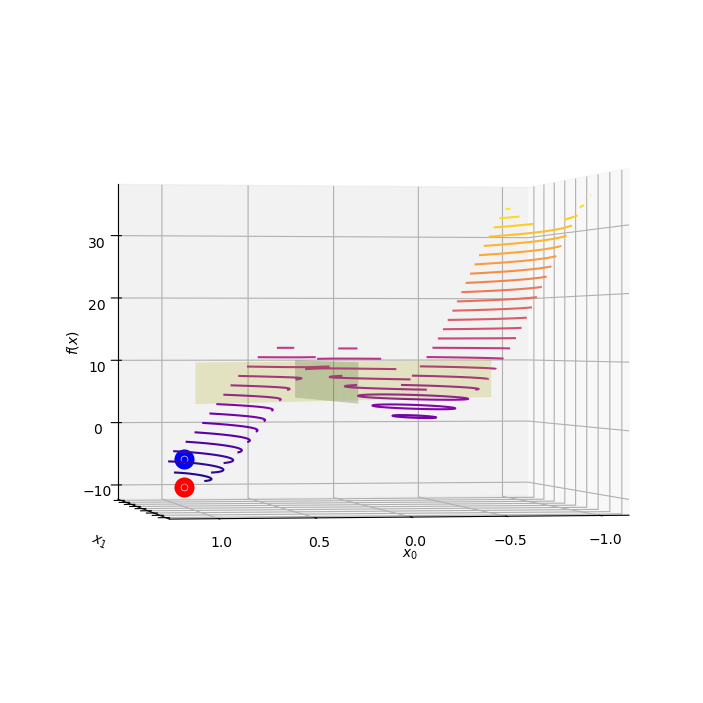

In [82]:
# Second subplot
fig = plt.figure(figsize=(30, 20))
ax = fig.add_subplot(1, 3, 2, projection='3d')
ax.contour3D(X0, X1, Z, 40, cmap='plasma')
ax.scatter(min_x0, min_x1, min_z, marker='o', color='red', linewidth=10)
ax.scatter(min_x0_lin_constr, min_x1_lin_constr, min_z_lin_constr, marker='o', color='blue', linewidth=10)
ax.plot_surface(X0_lin_1, X1_lin_1, Z_lin_1, color='green', alpha=0.2)
ax.plot_surface(X0_lin_2, X1_lin_2, Z_lin_1, color='yellow', alpha=0.2)
ax.set_xlabel('$x_{0}$')
ax.set_ylabel('$x_{1}$')
ax.set_zlabel('$f(x)$')
ax.axes.yaxis.set_ticklabels([])
ax.view_init(0, 80)

plt.show()